In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


In [3]:
uni=pd.read_csv('/content/Universities.csv')
uni.head()

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,Brown,1310,89,22,13,22704,94
1,CalTech,1415,100,25,6,63575,81
2,CMU,1260,62,59,9,25026,72
3,Columbia,1310,76,24,12,31510,88
4,Cornell,1280,83,33,13,21864,90


In [4]:
uni.describe() #data should be normalized

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
count,25.000000,25.000000,25.000000,25.00000,25.000000,25.000000
mean,1266.440000,76.480000,39.200000,12.72000,27388.000000,86.720000
std,108.359771,19.433905,19.727308,4.06735,14424.883165,9.057778
min,1005.000000,28.000000,14.000000,6.00000,8704.000000,67.000000
25%,1240.000000,74.000000,24.000000,11.00000,15140.000000,81.000000
50%,1285.000000,81.000000,36.000000,12.00000,27553.000000,90.000000
75%,1340.000000,90.000000,50.000000,14.00000,34870.000000,94.000000
max,1415.000000,100.000000,90.000000,25.00000,63575.000000,97.000000


In [5]:
#Considering only numerical data
uni=uni.iloc[:,1:]  #exclude 0th column
uni.head()

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,1310,89,22,13,22704,94
1,1415,100,25,6,63575,81
2,1260,62,59,9,25026,72
3,1310,76,24,12,31510,88
4,1280,83,33,13,21864,90


In [6]:
#Normalizing the numerical data
std=StandardScaler()
uni_normal=std.fit_transform(uni)
uni_normal

array([[ 0.41028362,  0.6575195 , -0.88986682,  0.07026045, -0.33141256,
         0.82030265],
       [ 1.39925928,  1.23521235, -0.73465749, -1.68625071,  2.56038138,
        -0.64452351],
       [-0.06065717, -0.76045386,  1.02438157, -0.93346022, -0.16712136,
        -1.65863393],
       [ 0.41028362, -0.02520842, -0.78639393, -0.18066972,  0.29164871,
         0.14422904],
       [ 0.12771914,  0.34241431, -0.32076595,  0.07026045, -0.39084607,
         0.36958691],
       [ 0.69284809,  0.6575195 , -0.83813038, -0.68253005,  0.33778044,
         0.93298158],
       [ 0.4573777 ,  0.71003703, -0.47597528, -0.18066972,  0.29695528,
         0.93298158],
       [-0.10775125, -0.13024348, -0.78639393, -0.18066972, -0.51381683,
         0.59494478],
       [ 1.25797704,  0.76255456, -1.30375836, -0.43159988,  0.85874344,
         1.15833946],
       [ 0.36318954, -0.07772595,  0.24833493, -1.43532055,  2.21481798,
         0.0315501 ],
       [ 1.06960072,  0.92010716, -0.47597528, -0.

In [8]:
pca=PCA()
pca_components=pca.fit(uni_normal)
# if you don't pass any parameter by default it will consider all 6 dimensions
#pca2=PCA(n_components=2) # or you can pass specific no. of variables
#pca_components=pd.DataFrame(pca2.fit_transform(uni_normal),columns=['a','b'])

In [10]:
# The amount of variance that each PCA explains is
pca.explained_variance_


array([4.80425527, 0.81960016, 0.29850193, 0.17060428, 0.12948562,
       0.02755274])

In [11]:
# in percentage-The amount of variance that each PCA explains is
var=pca.explained_variance_ratio_
var

array([0.76868084, 0.13113602, 0.04776031, 0.02729668, 0.0207177 ,
       0.00440844])

In [13]:
#cumulative variance
var1=np.cumsum(np.round(var,decimals=4)*100)
var1   # 76 76+13=89 89+4=93 and so on i.e. if you stop upto 3rd column still you will get 95 %

array([ 76.87,  89.98,  94.76,  97.49,  99.56, 100.  ])

In [14]:
pca.components_ #6 dimentional components

array([[-0.45774863, -0.42714437,  0.42430805,  0.39064831, -0.36252316,
        -0.37940403],
       [ 0.03968044, -0.19993153,  0.32089297, -0.43256441,  0.6344864 ,
        -0.51555367],
       [ 0.1870388 ,  0.49780855, -0.15627899,  0.60608085,  0.20474114,
        -0.53247261],
       [ 0.13124033,  0.37489567,  0.0612872 , -0.50739095, -0.62340055,
        -0.43863341],
       [ 0.02064583,  0.4820162 ,  0.8010936 ,  0.07682369,  0.07254775,
         0.33810965],
       [ 0.8580547 , -0.39607492,  0.21693361,  0.1720479 , -0.17376309,
        -0.00353754]])

In [16]:
uni.columns

 # linear combination equation, constant values are taken from above array o/p
 # PCA1 = -0.45*SAT - 0.427*Top10 + 0.42*Accept + 0.39*SFRatio - 0.36*Expenses - 0.37*GradRate

Index(['SAT', 'Top10', 'Accept', 'SFRatio', 'Expenses', 'GradRate'], dtype='object')

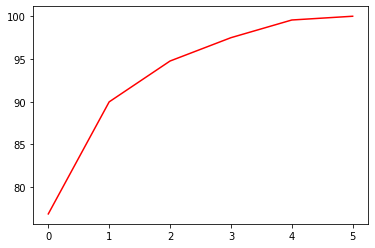

In [20]:
# Variance plot for PCA components
plt.plot(var1,color='red')  # var1 is cumulative percentage on y axis and index on x axis
# looking at graph you can decide how much percentage you want and accordingly go for that much column numbers

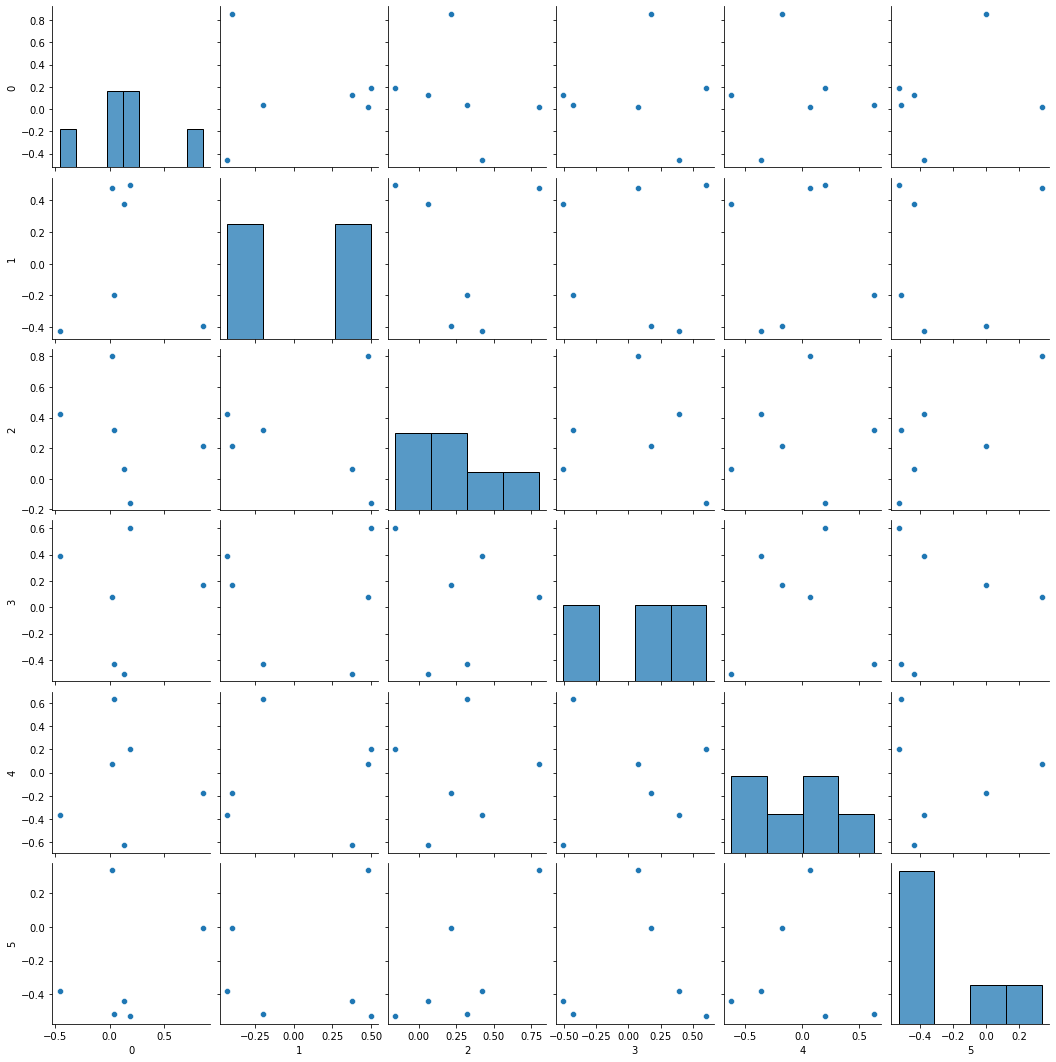

In [22]:
# Why scatterplot? - After applying PCA there should not be any correlation. Thus multicollinearity is removed or not that you can cross check.
import seaborn as sns

sns.pairplot(pd.DataFrame(pca.components_))

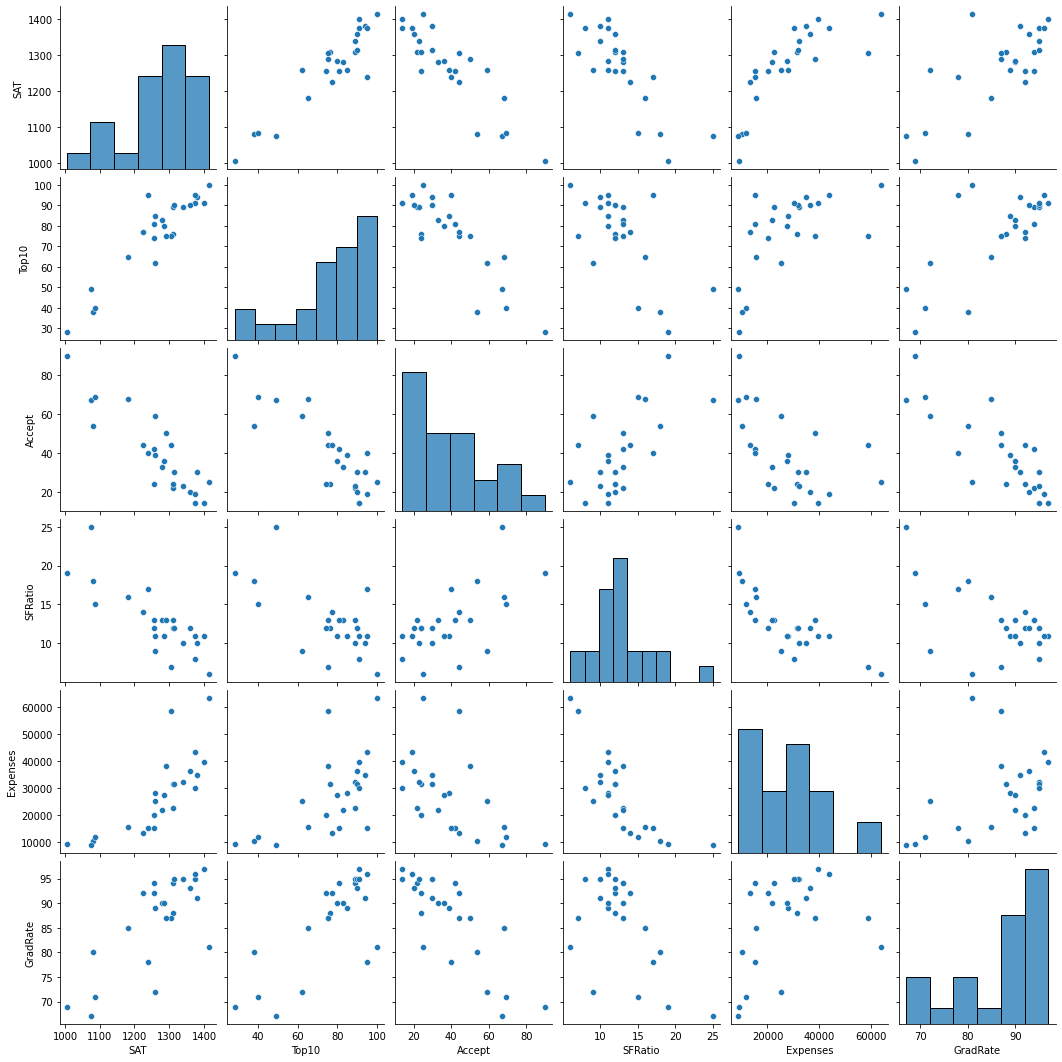

In [24]:
sns.pairplot(uni)  # can check scatterplot with original dataset and see the difference